In [1]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~ Carac - Exploration, nettoyage des données et DataViz ~~~~~~~~~~~~~~~~~~~~~~~~~~~~ # 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

carac = pd.read_csv('projet_ datascientest/caracteristiques.csv', low_memory=False)


In [4]:
carac.head(20)

,Unnamed: 0,num_acc,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,annee
0,1,200500000001,1,12,1900,3,2,1,1.0,3.0,11,CD41B,M,5051500,294400,590,2005
1,2,200500000002,1,21,1600,1,2,1,1.0,1.0,51,rue de Lille,M,5053700,280200,590,2005
2,3,200500000003,1,21,1845,3,1,1,2.0,1.0,51,NaN,M,5054600,280000,590,2005
3,4,200500000004,1,4,1615,1,1,1,1.0,5.0,82,NaN,M,5098700,240800,590,2005
4,5,200500000005,1,10,1945,3,1,1,3.0,6.0,478,NaN,M,5096400,247500,590,2005
5,6,200500000006,1,28,1415,1,1,1,8.0,6.0,82,NaN,M,5099500,239700,590,2005
6,7,200500000007,1,3,1530,1,1,1,1.0,3.0,130,NaN,M,0,0,590,2005
7,8,200500000008,1,18,2115,5,2,1,2.0,6.0,404,le hameau du lac,M,5105200,253300,590,2005
8,9,200500000009,1,25,1715,1,1,2,8.0,3.0,309,NaN,M,5097300,257100,590,2005
9,10,200500000010,1,29,2015,3,1,1,2.0,6.0,260,NaN,M,5106500,252400,590,2005


In [5]:
carac.shape

(1121571, 17)

In [6]:
carac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121571 entries, 0 to 1121570
Data columns (total 17 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1121571 non-null  int64  
 1   num_acc     1121571 non-null  int64  
 2   mois        1121571 non-null  int64  
 3   jour        1121571 non-null  int64  
 4   hrmn        1121571 non-null  object 
 5   lum         1121571 non-null  int64  
 6   agg         1121571 non-null  int64  
 7   int         1121571 non-null  int64  
 8   atm         1121498 non-null  float64
 9   col         1121552 non-null  float64
 10  com         1121569 non-null  object 
 11  adr         978295 non-null   object 
 12  gps         643154 non-null   object 
 13  lat         634503 non-null   object 
 14  long        634499 non-null   object 
 15  dep         1121571 non-null  object 
 16  annee       1121571 non-null  int64  
dtypes: float64(2), int64(8), object(7)
memory usage: 145.5+ MB


In [7]:
### Gestion des doublons ###
carac.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1121566    False
1121567    False
1121568    False
1121569    False
1121570    False
Length: 1121571, dtype: bool

In [8]:
# Le dataset carac ne contient aucuns doublons

In [9]:
### Gestion des valeurs manquantes ###

# 1. Détection et calcul du nombre de colonnes qui contiennent des NANs
colonnes_nans = carac.isna().any(axis=0).sum()
print(colonnes_nans, 'colonnes de carac contiennent des NANs. \n')

7 colonnes de carac contiennent des NANs. 



In [10]:
# 2. Détection et calcul du nombre de lignes qui contiennent des NANs
lignes_nans = carac.isna().any(axis=1).sum()
print(lignes_nans, 'lignes de carac contiennent des NANs. \n')

628744 lignes de carac contiennent des NANs. 



In [11]:
# 3. Nombre de NANs par colonne
colonnes_nbnans = carac.isna().sum(axis=0)
print('La colonne contenant le plus de NANs est:', colonnes_nbnans.idxmax())

La colonne contenant le plus de NANs est: long


In [12]:
# 4. Synthèse et affichage du nombre total de NANs par colonne  
carac.isna().sum()

Unnamed: 0         0
num_acc            0
mois               0
jour               0
hrmn               0
lum                0
agg                0
int                0
atm               73
col               19
com                2
adr           143276
gps           478417
lat           487068
long          487072
dep                0
annee              0
dtype: int64

In [13]:
# 5. Taux de NANs concernant les colonnes concernées
# 5.1 = long : 43.42 %
# 5.2 = lat : 43.41 %
# 5.3 = gps : 42.65 %
# 5.4 = adr : 12.77 %

In [14]:
# 5. Remplacement des valeurs manquantes
# Les variables explicatives 'adr', 'gps', 'lat' et 'long' de type catégorielle peuvent être remplacées soit :
# avec le mode (la modalité la plus fréquente) : non pertinent dans le cas présent
# par une constante 0 ou -1
    
carac['long'] = carac['long'].fillna(0)
carac['lat'] = carac['lat'].fillna(0)
carac['gps'] = carac['gps'].fillna(0)
carac['adr'] = carac['adr'].fillna(0)

In [15]:
# 6. On vérifie que ces 4 colonnes ne contiennent plus de NANs
carac[['long', 'lat', 'gps', 'adr']].isna().sum()

long    0
lat     0
gps     0
adr     0
dtype: int64

In [16]:
# 7. Nombre de valeurs uniques
for colname in carac.columns:
  print(f"Nombre de valeurs uniques dans la colonne {colname}: ", carac[colname].nunique())

Nombre de valeurs uniques dans la colonne Unnamed: 0:  1121571
Nombre de valeurs uniques dans la colonne num_acc:  1121571
Nombre de valeurs uniques dans la colonne mois:  12
Nombre de valeurs uniques dans la colonne jour:  31
Nombre de valeurs uniques dans la colonne hrmn:  2876
Nombre de valeurs uniques dans la colonne lum:  6
Nombre de valeurs uniques dans la colonne agg:  2
Nombre de valeurs uniques dans la colonne int:  11
Nombre de valeurs uniques dans la colonne atm:  10
Nombre de valeurs uniques dans la colonne col:  8
Nombre de valeurs uniques dans la colonne com:  19898
Nombre de valeurs uniques dans la colonne adr:  468170
Nombre de valeurs uniques dans la colonne gps:  11
Nombre de valeurs uniques dans la colonne lat:  329194
Nombre de valeurs uniques dans la colonne long:  363797
Nombre de valeurs uniques dans la colonne dep:  204
Nombre de valeurs uniques dans la colonne annee:  17


In [17]:
# 8. On redéfinit l'index de notre DataFrame carac avec le numéro d'identifiant de l'accident
carac.index = carac['num_acc']
display(carac.head())

,Unnamed: 0,num_acc,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,annee
num_acc,,,,,,,,,,,,,,,,,
200500000001,1,200500000001,1,12,1900,3,2,1,1.0,3.0,11,CD41B,M,5051500,294400,590,2005
200500000002,2,200500000002,1,21,1600,1,2,1,1.0,1.0,51,rue de Lille,M,5053700,280200,590,2005
200500000003,3,200500000003,1,21,1845,3,1,1,2.0,1.0,51,0,M,5054600,280000,590,2005
200500000004,4,200500000004,1,4,1615,1,1,1,1.0,5.0,82,0,M,5098700,240800,590,2005
200500000005,5,200500000005,1,10,1945,3,1,1,3.0,6.0,478,0,M,5096400,247500,590,2005


In [18]:
# 9. On supprime les colonnes 'Unnamed: 0' et 'num_acc'
carac = carac.drop(['Unnamed: 0', 'num_acc'], axis=1)
display(carac.head())

,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,annee
num_acc,,,,,,,,,,,,,,,
200500000001,1,12,1900,3,2,1,1.0,3.0,11,CD41B,M,5051500,294400,590,2005
200500000002,1,21,1600,1,2,1,1.0,1.0,51,rue de Lille,M,5053700,280200,590,2005
200500000003,1,21,1845,3,1,1,2.0,1.0,51,0,M,5054600,280000,590,2005
200500000004,1,4,1615,1,1,1,1.0,5.0,82,0,M,5098700,240800,590,2005
200500000005,1,10,1945,3,1,1,3.0,6.0,478,0,M,5096400,247500,590,2005


In [19]:
### Dépendances statistiques entre les variables explicatives
### et entre les variables explicatives et la variable cible 'col' """

# Affichage du tableau des corrélations entre chaque paire de variables du DataFrame carac
carac.corr()

,mois,jour,lum,agg,int,atm,col,annee
mois,1.000000,-0.017122,0.057560,-0.008961,0.001299,0.012980,-0.005524,0.006973
jour,-0.017122,1.000000,-0.005486,-0.003308,-0.001665,-0.006287,-0.002461,0.002873
lum,0.057560,-0.005486,1.000000,0.086452,0.020221,0.027874,0.064903,-0.003403
agg,-0.008961,-0.003308,0.086452,1.000000,0.161032,-0.060203,0.013123,-0.041653
int,0.001299,-0.001665,0.020221,0.161032,1.000000,0.002357,-0.062131,0.079246
atm,0.012980,-0.006287,0.027874,-0.060203,0.002357,1.000000,0.023616,0.010897
col,-0.005524,-0.002461,0.064903,0.013123,-0.062131,0.023616,1.000000,-0.014385
annee,0.006973,0.002873,-0.003403,-0.041653,0.079246,0.010897,-0.014385,1.000000


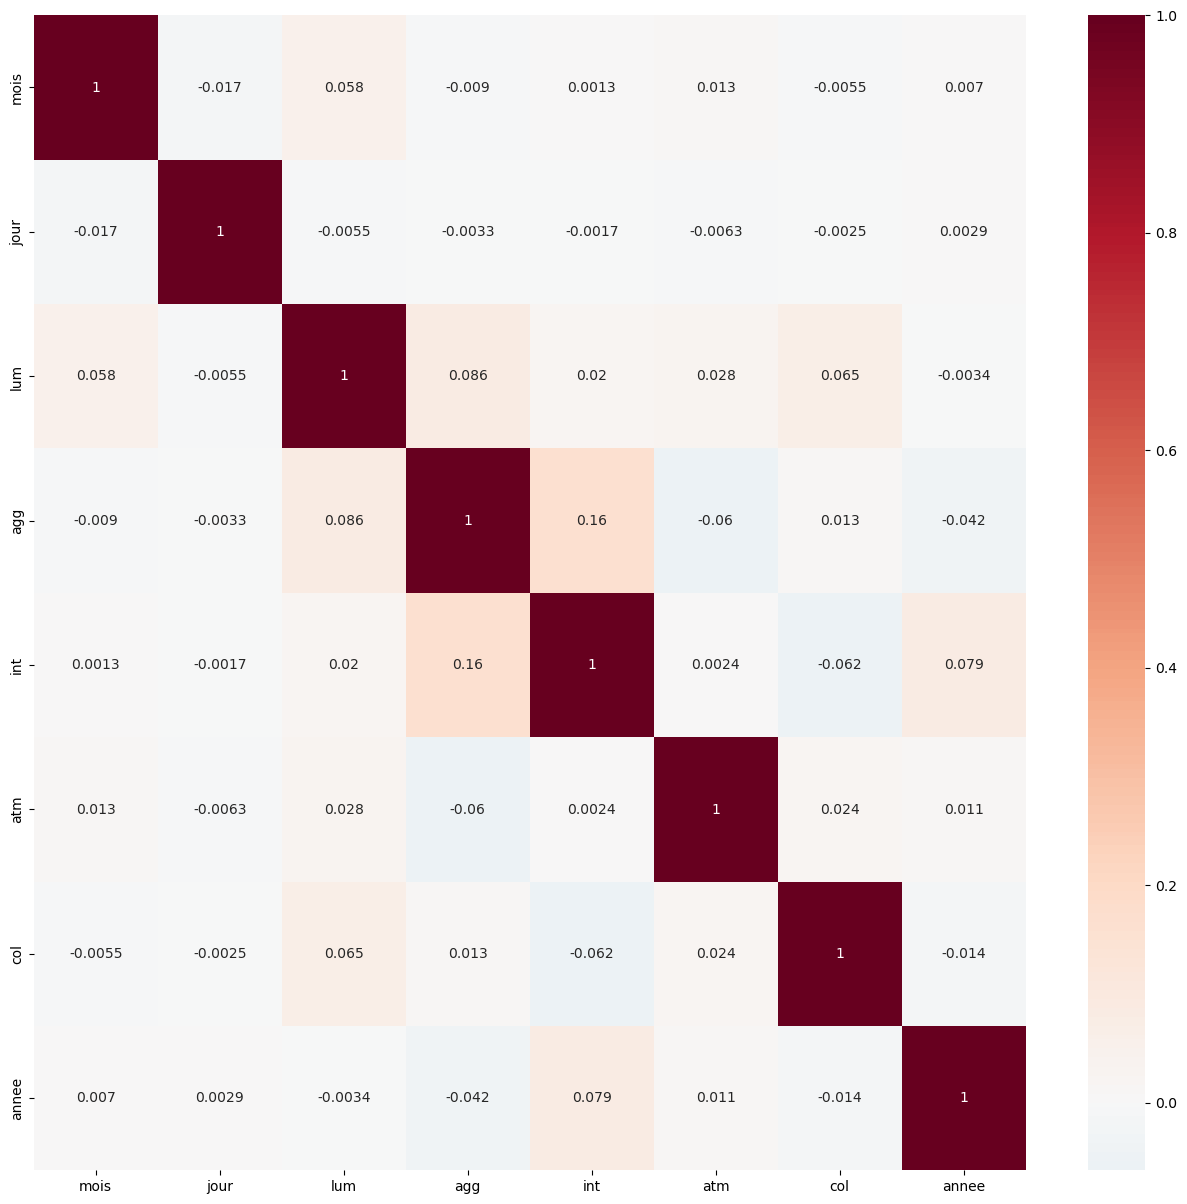

In [19]:
# Heatmap de corrélations entre toutes les variables du DataFrame carac permetttant de repérer les variables importantes
# et celles colinéaires entre elles
correlation_matrix = carac.corr()
plt.figure(figsize=(16, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0)
plt.show()

In [21]:
# On peut constater que toutes les variables explicatives sont décorrélées les unes par rapport aux autres.
# Les variables explicatives sont décorrélées par rapport à la variable cible du DataFrame carac ('col') 

In [22]:
### Pertinence métier des variables 'col', 'int', 'lum', 'atm', 'jour', 'mois', 'année' 
# Il me semble judicieux d'analyser plus précisément ces features qui seront pertinentes dans la prédiction
# de la gravité d'un accident

In [23]:
# Calcul du nombre d'occurences de chaque modalité de la variable 'col'
carac['col'].value_counts()

 6.0    365928
 3.0    324774
 2.0    132759
 7.0    115221
 1.0    109683
 4.0     35941
 5.0     35709
-1.0      1537
Name: col, dtype: int64

In [24]:
# Calcul du nombre d'occurences de chaque modalité de la variable 'mois'
carac['mois'].value_counts()

10    106702
6     105582
9     104248
7     101169
5      95761
11     95399
12     92134
4      87040
1      86332
3      86313
8      84833
2      76058
Name: mois, dtype: int64

In [25]:
# Calcul du nombre d'occurences de chaque modalité de la variable 'jour'
carac['jour'].value_counts()  

6     38286
12    38063
7     38041
10    38022
9     37783
16    37697
8     37593
15    37417
5     37243
19    37241
4     37239
18    37198
14    37196
13    37184
21    37149
11    37147
17    36928
3     36848
20    36841
22    36687
23    36595
2     36388
28    36051
24    35833
27    35533
1     35235
25    35118
26    35092
30    33913
29    33864
31    20146
Name: jour, dtype: int64

In [26]:
# Calcul nombre d'accidents selon le type d'intersection
counts = carac['int'].value_counts()
print(counts)

 1    785408
 2    136814
 3    102684
 6     32910
 9     24002
 4     17626
 5     11115
 7      9517
 8      1387
 0       107
-1         1
Name: int, dtype: int64


In [27]:
# Tri par type d'intersection
counts = counts.sort_index()
print(counts)

-1         1
 0       107
 1    785408
 2    136814
 3    102684
 4     17626
 5     11115
 6     32910
 7      9517
 8      1387
 9     24002
Name: int, dtype: int64


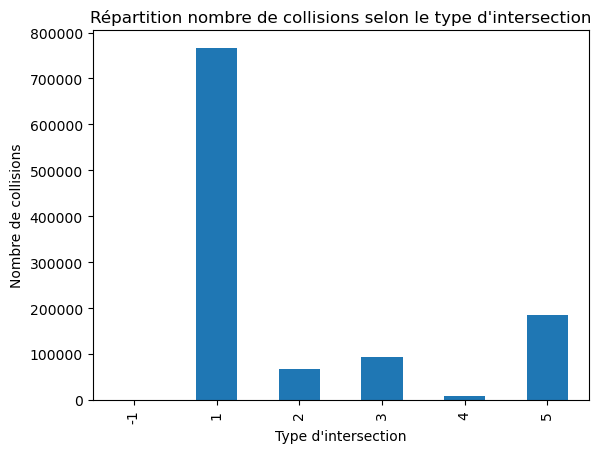

In [60]:
# Répartition du nombre de collisions selon le type d'intersection 
counts.plot(kind='bar')

plt.title("Répartition nombre de collisions selon le type d'intersection")
plt.xlabel("Type d'intersection")
plt.ylabel("Nombre de collisions")
plt.show()

# Type d'intersection : 
1 – Hors intersection 
2 – Intersection en X 
3 – Intersection en T 
4 – Intersection en Y 
5 – Intersection à plus de 4 branches 
6 – Giratoire 
7 – Place 
8 – Passage à niveau 
9 – Autre intersection

In [29]:
# la lecture du graphique fait apparaitre une sur-représentation d'accident/collisions dans un contexte hors intersection.

In [30]:
# Statistiques descriptives sur la variable cible ('int') du fichier carac
print(carac['int'].describe())

count    1.121571e+06
mean     1.769267e+00
std      1.632726e+00
min     -1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.000000e+00
Name: int, dtype: float64


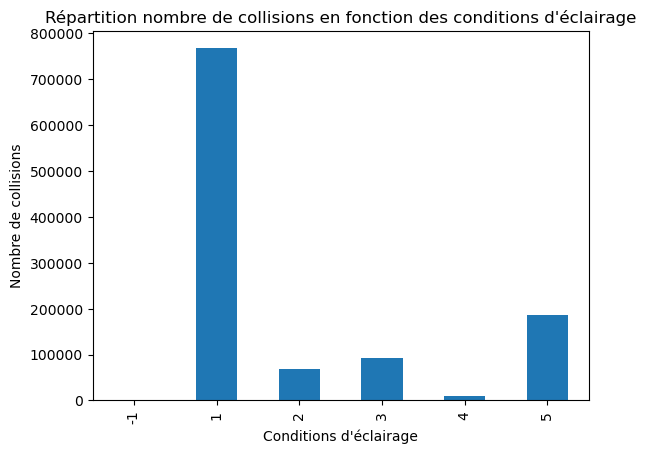

In [59]:
# Calcul du nombre de collisions en fonction des conditions d'éclairage
counts = carac['lum'].value_counts()

# Tri selon les conditions d'éclairage
counts = counts.sort_index()

# Répartition du nombre de collisions en fonction des conditions d'éclairage 
counts.plot(kind='bar')

plt.title("Répartition nombre de collisions en fonction des conditions d'éclairage")
plt.xlabel("Conditions d'éclairage")
plt.ylabel("Nombre de collisions")

plt.show()

# Conditions d’éclairage dans lesquelles l'accident s'est produit : 
1 – Plein jour 
2 – Crépuscule ou aube 
3 – Nuit sans éclairage public 
4 – Nuit avec éclairage public non allumé 
5 – Nuit avec éclairage public allumé


In [32]:
# la lecture du graphique montre que les collisions se produisent en forte majorité en plein jour ou durant la nuit
# avec un éclairage public. A savoir dans des contextes où la luminosité est bonne voire très bonne (en plein jour).

In [33]:
# Statistiques descriptives sur la variable explicative ('lum')
print(carac['lum'].describe())

count    1.121571e+06
mean     1.911852e+00
std      1.509596e+00
min     -1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.000000e+00
Name: lum, dtype: float64


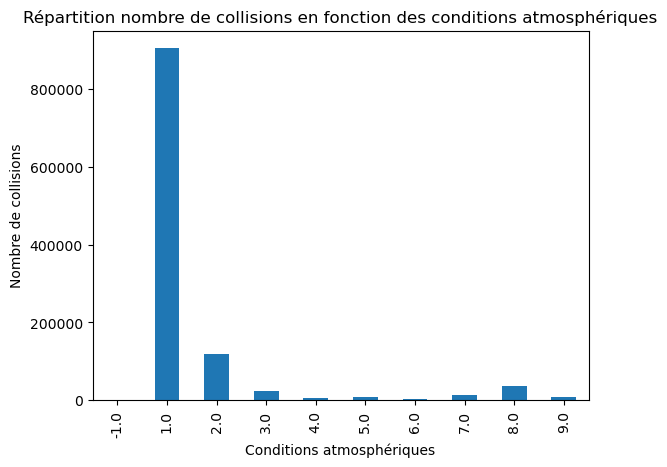

In [61]:
# Calcul du nombre de collisions en fonction des conditions atmosphériques
counts = carac['atm'].value_counts()

# Tri selon les conditions atmosphériques 
counts = counts.sort_index()

# Répartition nombre de collisions en fonction des conditions atmosphériques 
counts.plot(kind='bar')

plt.title("Répartition nombre de collisions en fonction des conditions atmosphériques")
plt.xlabel("Conditions atmosphériques")
plt.ylabel("Nombre de collisions")

plt.show()

# Conditions atmosphériques : 
-1 – Non renseigné 
1 – Normale 
2 – Pluie légère 
3 – Pluie forte 
4 – Neige - grêle 
5 – Brouillard - fumée 
6 – Vent fort - tempête 
7 – Temps éblouissant 
8 – Temps couvert 
9 – Autre


In [35]:
# la lecture du graphique est inatendue puisque l'on peut observer que la majorité des collisions se produit 
# dans des conditions climatiques normales, sans intempréries ou tout autre perturbation atmosphérique.
# On constate toutefois qu'une pluie légère est la deuxième cause de collision.

In [36]:
# Statistiques descriptives sur la variable explicative ('atm')
print(carac['atm'].describe())

count    1.121498e+06
mean     1.562441e+00
std      1.608666e+00
min     -1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.000000e+00
Name: atm, dtype: float64


C:\Users\clevr\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-10-2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\clevr\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29-10-2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\clevr\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18-10-2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\clevr\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-10-2005' in DD/MM/YYYY format. Provide format or specif

C:\Users\clevr\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24-12-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\clevr\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-10-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\clevr\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20-12-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\clevr\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28-11-2014' in DD/MM/YYYY format. Provide format or specif

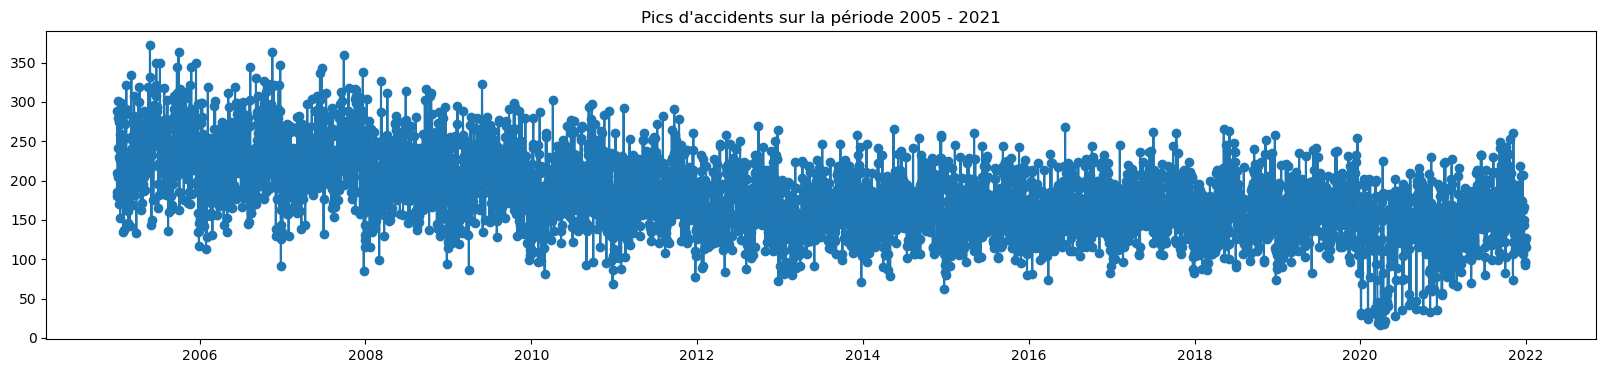

In [40]:
# Visualisation des tendances de pics d'accidents entre 2005 et fin 2021

carac['date'] = carac['jour'].astype(str) + '-' + carac['mois'].astype(str) + '-' + carac['annee'].astype(str) 
carac['date'] = pd.to_datetime(carac['date'])

values = carac['date'].value_counts().sort_index()

plt.figure(figsize=(20, 4))
plt.plot_date(values.index, values, linestyle='-')
plt.title("Pics d'accidents sur la période 2005 - 2021");

In [41]:
### Avec le graphe précédent, on constate une décroissance des pics d'accidents entre 2002 et fin 2021 qui peut s'expliquer
### par l'hypothèse suivante :

# l'intensification de la répression de la délinquance routière, et notamment des excès de vitesse, avec l'augmentation
# des radars durant le mandat de président de Nicolas Sarkozy entre 2007 et 2012 mais également entre 2005 et 2007 
# lorsqu'il était ministre de l'intérieur.

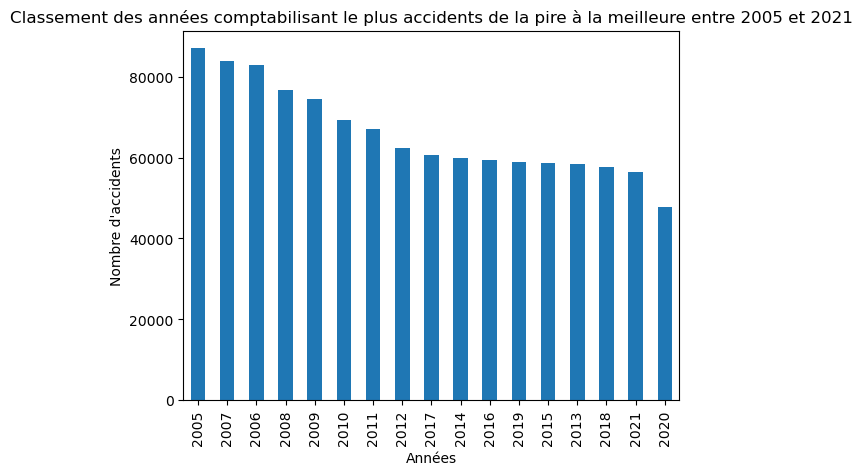

In [46]:
# Classement des années comptabilisant le plus d'accidents (de la pire à la meilleure entre 2005 et 2021)
counts_2 = carac['annee'].value_counts()

# Nombre d'accidents sous forme de graphe
counts_2.plot(kind='bar')

plt.title("Classement des années comptabilisant le plus accidents de la pire à la meilleure entre 2005 et 2021")
plt.xlabel("Années")
plt.ylabel("Nombre d'accidents")
plt.show()

In [47]:
# l'année comptabilisant le moins d'accidents est l'année 2020 qui a été fortement impacté par les périodes de confinement
# en raison du Covid.

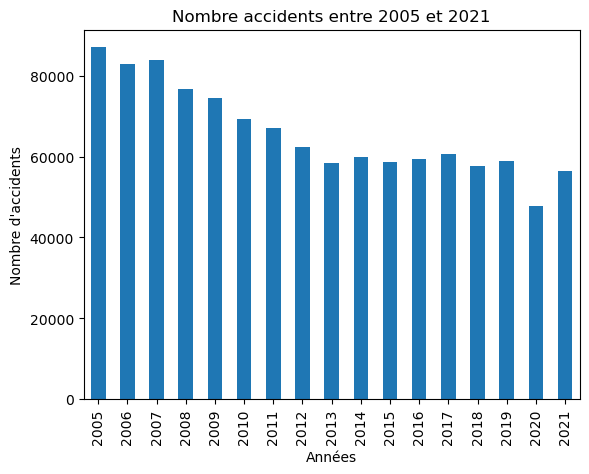

In [48]:
# Le nombre d'accidents entre 2005 et 2021
counts_2 = carac['annee'].value_counts()

# Tri selon les années chronologiques (entre 2005 à 2021) 
counts_2 = counts_2.sort_index()

# Nombre d'accidents sous forme de graphe
counts_2.plot(kind='bar')
plt.title("Nombre accidents entre 2005 et 2021")
plt.xlabel("Années")
plt.ylabel("Nombre d'accidents")
plt.show()


In [49]:
# Cela confirme la tendance générale constatée sur le graphe précédent avec une décroissance du nombre d'accidents
# entre 2005 et fin 2013. A une exception près, l'année 2012 a enregistrée un pic par rapport aux années précédentes,
# ce qui n'était pas visible sur le graphe précédent.

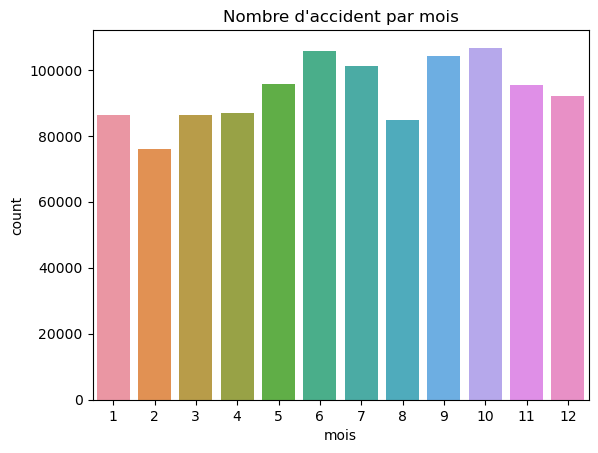

In [50]:
# Visualisation des mois qui sont plus propices aux accidents que d'autres.

# le nombre d'accidents par mois
sns.countplot(x=carac['mois'])
plt.title("Nombre d'accident par mois");

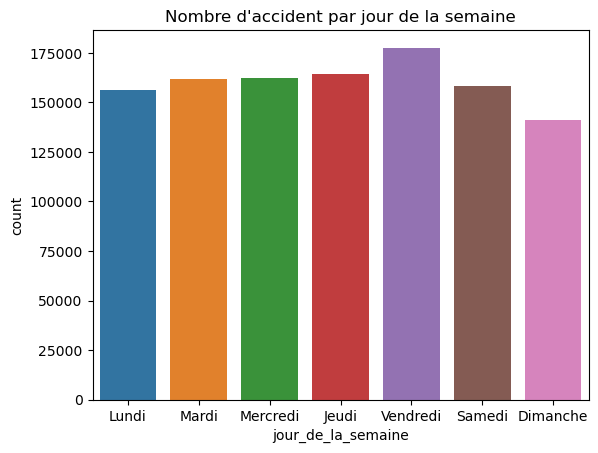

In [51]:
# Visualisation du nombre d'accidents en fonction des jours de la semaine 

carac['jour_de_la_semaine'] = carac['date'].dt.weekday

sns.countplot(x=carac['jour_de_la_semaine'])
plt.xticks(np.arange(7), ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'])
plt.title("Nombre d'accident par jour de la semaine");

In [52]:
# On constate qu'il y a plus d'accidents le vendredi, veille de weekend, et moins d'accidents le Dimanche.
# Sachant que la variable hrmn contient l'heure et les minutes de chaque accident, on peut encore affiner notre analyse
# avec le nombre d'accident réparti selon l'heure de la journée.

In [23]:
carac['hrmn'][carac['hrmn'].str.isdecimal() == False]

958469     01:30
958470     02:50
958471     15:15
958472     20:20
958473     04:00
           ...  
1121566    06:10
1121567    10:20
1121568    18:00
1121569    10:55
1121570    18:00
Name: hrmn, Length: 163102, dtype: object

In [ ]:
# Il s'avère que toutes les valeurs de la colonne 'hrmn' ne sont pas au format hrmn.
# Une quantité de valeurs non négligeable est au format hr:mn 

In [24]:
# Test code
my_string = '15:30'

In [25]:
# Test code
my_string.partition(':')

('15', ':', '30')

In [26]:
# Test code
x, y, z = my_string.partition(':')

In [29]:
# Test code
x+z

'1530'

In [28]:
# Test code
h = x+z

In [32]:
# Test code
int(h)

1530

In [33]:
# Création d'une fonction permettant d'avoir toutes les valeurs hrmn au bon format 
def get_hrmn(x):
    if x.isdecimal():
        return x
    hr, sep, mn = x.partition(':')
    return hr+mn

In [34]:
# Test code
get_hrmn(my_string)

'1530'

In [35]:
# Application de la fonction get_hrmn à la colonne 'hrmn'
carac['hrmn'].apply(get_hrmn)

0          1900
1          1600
2          1845
3          1615
4          1945
           ... 
1121566    0610
1121567    1020
1121568    1800
1121569    1055
1121570    1800
Name: hrmn, Length: 1121571, dtype: object

In [36]:
carac_hrmn = carac['hrmn'].apply(get_hrmn) # Series pour les tests

In [37]:
carac_hrmn.astype('int')

0          1900
1          1600
2          1845
3          1615
4          1945
           ... 
1121566     610
1121567    1020
1121568    1800
1121569    1055
1121570    1800
Name: hrmn, Length: 1121571, dtype: int32

In [38]:
carac['heure'] = carac_hrmn.astype('int')//100

In [39]:
print(carac['heure'])

0          19
1          16
2          18
3          16
4          19
           ..
1121566     6
1121567    10
1121568    18
1121569    10
1121570    18
Name: heure, Length: 1121571, dtype: int32


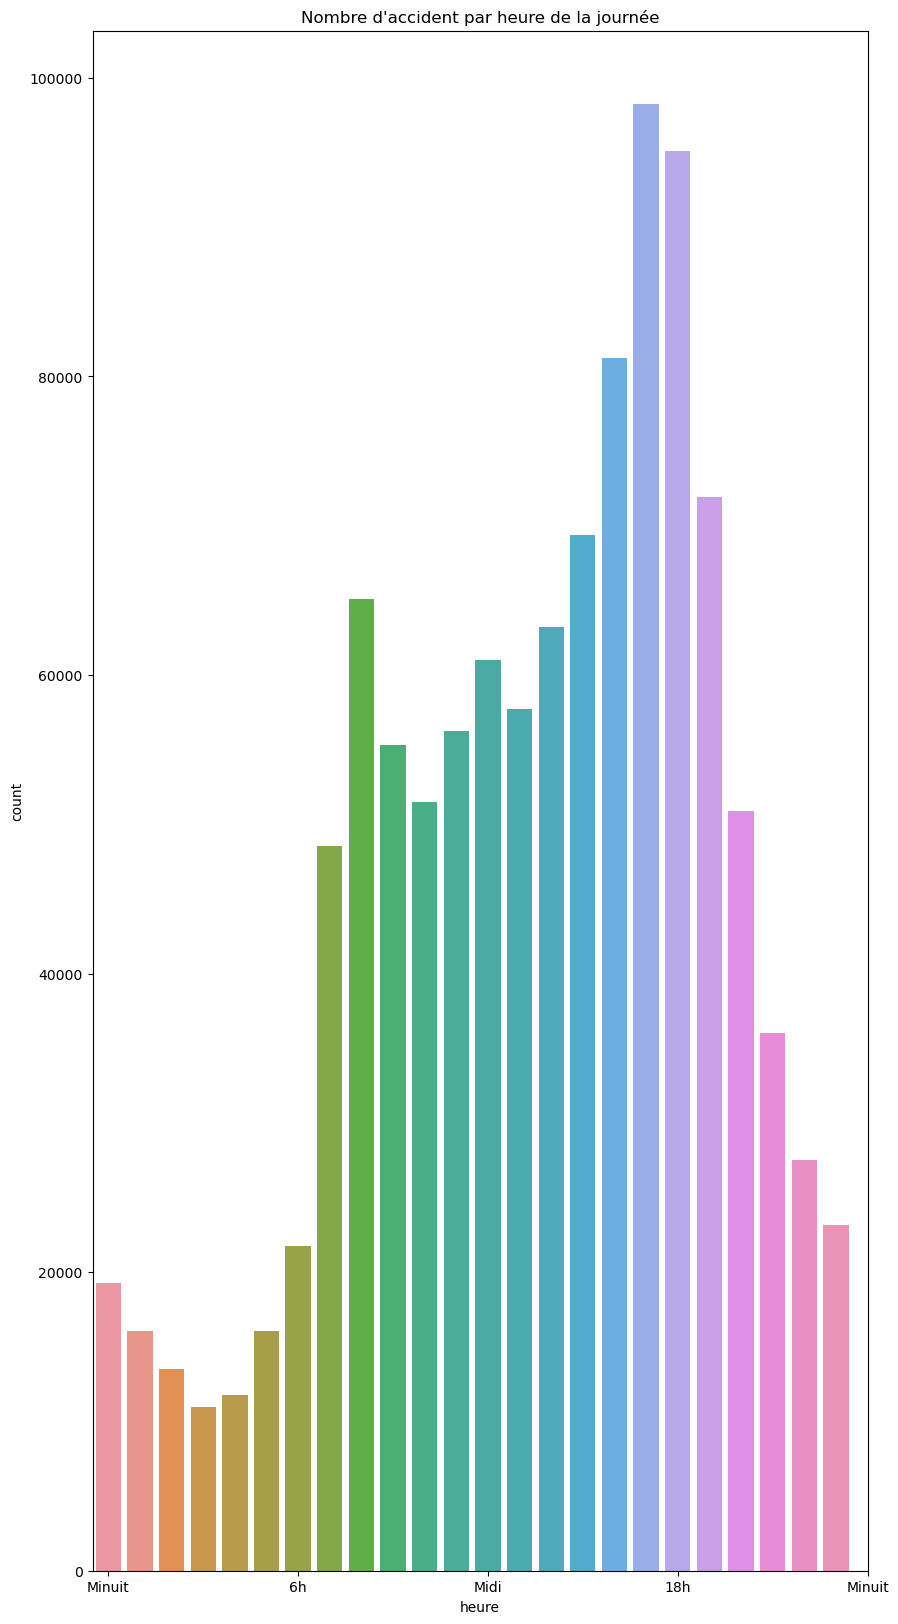

In [41]:
# Visualisation du nombre de collisions par heure de la journée
plt.figure(figsize=(10, 20))
sns.countplot(x=carac['heure'])
plt.xticks([0, 6, 12, 18, 24], ['Minuit', '6h', 'Midi', '18h', 'Minuit'])
plt.title("Nombre de collisions par heure de la journée")
plt.show();

In [42]:
# Il y a un pic d'accident entre 16h et 19h : c'est logique puisque ce sont les heures où la circulation est la plus dense.
# Cela correspond à la sortie des bureaux en semaine.

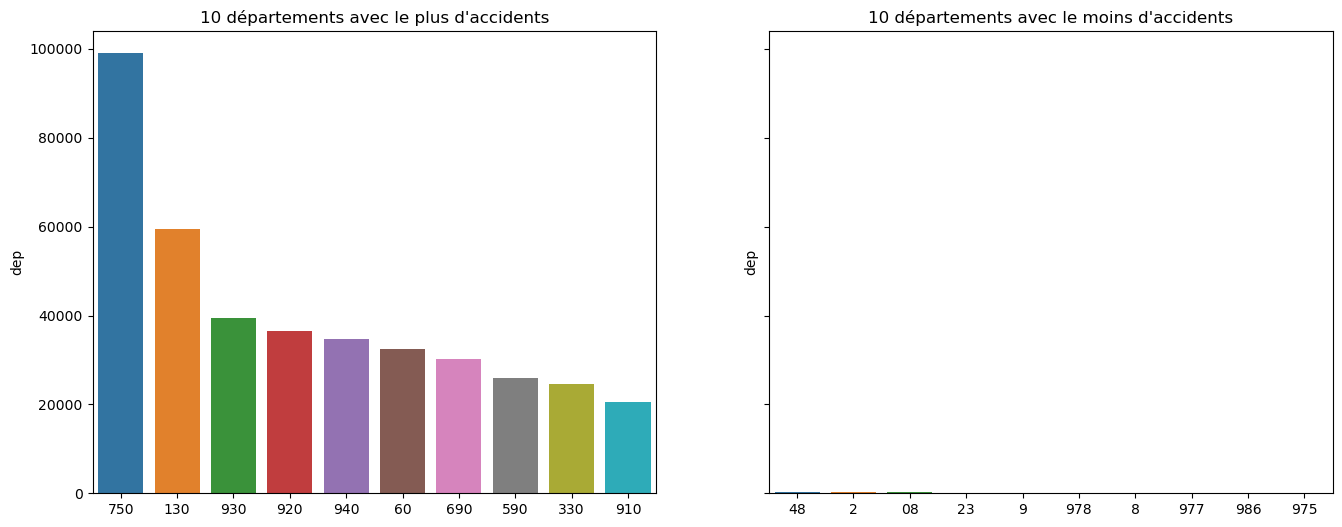

In [64]:
# Lieu des accidents : affichons les 10 départements avec le plus d'accidents, 
# et les 10 départements avec le moins d'accidents

max_col = carac['dep'].value_counts().head(10)
min_col = carac['dep'].value_counts().tail(10)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6), sharey=True)

sns.barplot(x=max_col.index, y=max_col, order=max_col.index, ax=ax1)
# max_col.plot.bar(ax=ax1)
ax1.title.set_text("10 départements avec le plus d'accidents")

sns.barplot(x=min_col.index, y=min_col, order=min_col.index, ax=ax2)
# min_col.plot.bar(ax=ax2)
ax2.title.set_text("10 départements avec le moins d'accidents");

In [65]:
# En tête des départements, nous trouvons sans réelle surprise : Paris(75), Marseille (13) et la Seine Saint Denis (93)
## Les 3 départements où il y a le moins de collisions : 975 (Saint-Pierre-et-Miquelon), 986 (Wallis-et-Futuna)
## et 977 (Saint-Barthélemy)

### La majorité des départements avec le plus d'accidents font partie des départements les plus peuplés de France. 
### La réciproque est aussi vraie pour les départements les moins peuplés.

In [ ]:
### Suggestions : afin de compléter la partie DataViz, nous pourrions mettre à profit la fusion des DataFrames
#'usagers' et 'carac' pour visualiser une carte de France avec les coordonnées gps identifiant les lieux de chaque collision en fonction
# en fonction du niveau de gravité des accidents, et en attribuant une couleur spécifique pour les blessés légers,
# les blessés graves et les personnes décédés suite à leurs blessures. Un graphe supplémentaire permettrait de visualiser
# l'influence des conditions atmosphériques et du type de collision sur la gravité des accidents.
